# Ishihara number detection

1. Train the model on the Mnist dataset to identify handwritten digits from 0 to 9.
2. Preprocess the Ishihara Color Bind Test cards to make them similar to the mnist dataset.
3. Test the model on the Ishihara dataset.

## Preprocessing steps may include
1. Increase the Contrast of image and do median blur.
2. Apply K-means clustering to segment image.
3. Apply thresholding operation.
4. Morphological opening, closing ,erosion.
5. Median blurring.

# MNIST

In [1]:
# Imports
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

# Additional Imports
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization, Input
from keras.models import load_model
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

2024-10-18 19:54:47.199847: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 19:54:47.199979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 19:54:47.363861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Variables Initialization
batch_size = 128
num_classes = 10
epochs = 50

# Data Loading
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalising Data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
# Main Model
model = Sequential()

model.add(Input((28,28,1))) 

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [5]:
# Callbacks and Early Stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

In [6]:
# Model Training
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
         callbacks = callbacks)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Saving the Model
model.save(os.path.join('models','best_model.h5'))

Epoch 1/50
 18/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4174 - loss: 2.8577 

I0000 00:00:1729281310.741730     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1729281310.765743     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8268 - loss: 0.6506

W0000 00:00:1729281318.319179     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1729281319.427754     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.15991, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8270 - loss: 0.6500 - val_accuracy: 0.9486 - val_loss: 0.1599
Epoch 2/50
  1/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9609 - loss: 0.1035

W0000 00:00:1729281320.433125     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9575 - loss: 0.1486
Epoch 2: val_loss improved from 0.15991 to 0.05004, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9576 - loss: 0.1485 - val_accuracy: 0.9856 - val_loss: 0.0500
Epoch 3/50
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9685 - loss: 0.1096
Epoch 3: val_loss did not improve from 0.05004
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9685 - loss: 0.1095 - val_accuracy: 0.9854 - val_loss: 0.0542
Epoch 4/50
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9744 - loss: 0.0891
Epoch 4: val_loss did not improve from 0.05004
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9744 - loss: 0.0891 - val_accuracy: 0.9847 - val_loss: 0.0532
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9773 - loss: 0.0780
Epoch 5: val_loss improved from 0.05004 to 0.04450, saving model to best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy:

# Ishihara

In [7]:
# pip install opencv-python-headless numpy scikit-learn matplotlib

In [8]:
# Creation of a circle of defined radius with black interior and white background
height, width = 28, 28
y, x = np.ogrid[:height, :width]

center_y, center_x = 14,14
radius = 13

circle_mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2

cir = circle_mask.astype(np.uint8) * 255
cir = cv2.bitwise_not(cir)

# Main Preprocessing Module
def ishihara(img_path):
    global cir
    
    # Reading the Image
    img = cv2.imread(img_path)
    
    # Filters
    kernel = np.ones((5, 5), np.uint8)
    erode_kernel = np.ones((3,3), np.uint8)

    # Main processing
    b, g, r = cv2.split(img)

    img = cv2.morphologyEx(r, cv2.MORPH_CLOSE, kernel)

    _, img = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)

    img = cv2.erode(img, erode_kernel, iterations=5)

    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    _, img = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)

    # Ad circle image if the more black pixels than white
    if np.sum(img) < 450 * 255:
        img = cv2.bitwise_not(img)
        cir = cir.astype(np.float32)
        img = img.astype(np.float32)
        img = cv2.add(img, cir)

    img = cv2.medianBlur(img, 3)
    _, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
    img = cv2.bitwise_not(img)
    
    return img

In [14]:

images = ["0_EncodeSans-Lighttheme_2 type_2.png",
"1_Waree-Obliquetheme_2 type_2.png",
"2_AveriaLibre-LightItalictheme_2 type_2.png",
"0_Asap-MediumItalictheme_3 type_3.png"]

         

In [15]:
# images= ["0_DejaVuSansCondensed-Obliquetheme_2 type_2.png","0_AveriaLibre-LightItalictheme_1 type_1.png","5_Tillana-Boldtheme_1 type_1","2_Waree-Obliquetheme_1 type_1.png","7_Spectral-Mediumtheme_3 type_3.png"]

In [16]:
# Laod the model
model=load_model('/kaggle/working/models/best_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Predicted class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Predicted class: [1]


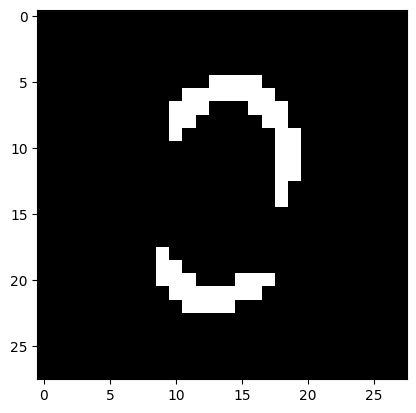

In [17]:
for file in images:
    # Input image for prediction
    image = ishihara("/kaggle/input/ishihara-blind-test-cards/data/"+ str(file))
    plt.imshow(image,cmap ='gray')

    # Conversion of image to required dimension as per the model 
    img = np.resize(image, (28,28,1))
    im2arr = np.array(image)
    im2arr = im2arr.reshape(1,28,28,1)

    # Prediction!!
    y_pred = model.predict(im2arr)
    predicted_classes = np.argmax(y_pred, axis=1)
    print(f"Predicted class: {predicted_classes}")
    
    